

---



---




---




# **FREEZING-OF-GAIT**


---



---



---


**Paulo Bastos & Raquel Barbosa,       August 13th 2022**
---




---



---


---



In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 18.8 MB/s 
     |████████████████████████████████| 9.8 MB 54.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=c37f4a931358dffa16a513a6a2433f542ba0ff967d8d918cac13b3c46ee2a936
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=70a43a7511e6236579812ee4e3ccda51d1aa52e3da679ff0ed3942d24353dac8
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install scikit_posthocs

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp



---



**Import Data at the time of clinical evaluation**



---





In [ ]:
FOG_Stim_conditions = pd.read_csv('FOG_Stim_conditions.csv', sep = ';')

In [ ]:
FOG_Stim_conditions.dtypes

patient              object
UPDRS_III             int64
Item_3_10             int64
Item_3_11             int64
Item_3_12             int64
SWS_time_s          float64
SWS_N_FOG_Events    float64
HY                    int64
AIMS                  int64
condition            object
dtype: object

In [ ]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          6
SWS_N_FOG_Events    6
HY                  0
AIMS                0
condition           0
dtype: int64

In [ ]:
FOG_Stim_conditions.nunique()

patient             17
UPDRS_III           38
Item_3_10            4
Item_3_11            5
Item_3_12            5
SWS_time_s          69
SWS_N_FOG_Events    26
HY                   4
AIMS                18
condition            5
dtype: int64

In [ ]:
print(FOG_Stim_conditions)

   patient  UPDRS_III  Item_3_10  Item_3_11  Item_3_12  SWS_time_s  \
0       A1         55          2          2          0        49.0   
1       B2         79          2          3          0        75.0   
2       C3         65          3          4          1       439.0   
3       D4         75          4          4          4       258.0   
4       E5         59          2          3          3       111.0   
..     ...        ...        ...        ...        ...         ...   
80     M13         44          2          4          0       166.0   
81     N14         29          2          2          0        55.0   
82     O15         39          2          2          0        17.0   
83     P16         42          2          1          0        25.0   
84     Q17         41          2          0          3        71.0   

    SWS_N_FOG_Events  HY  AIMS            condition  
0                2.0   2     0     MED_OFF_STIM_OFF  
1                4.0   2     0     MED_OFF_STIM_OFF

In [ ]:
FOG_Stim_conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient           85 non-null     object 
 1   UPDRS_III         85 non-null     int64  
 2   Item_3_10         85 non-null     int64  
 3   Item_3_11         85 non-null     int64  
 4   Item_3_12         85 non-null     int64  
 5   SWS_time_s        79 non-null     float64
 6   SWS_N_FOG_Events  79 non-null     float64
 7   HY                85 non-null     int64  
 8   AIMS              85 non-null     int64  
 9   condition         85 non-null     object 
dtypes: float64(2), int64(6), object(2)
memory usage: 6.8+ KB


In [ ]:
FOG_Stim_conditions.isnull().sum()

patient             0
UPDRS_III           0
Item_3_10           0
Item_3_11           0
Item_3_12           0
SWS_time_s          6
SWS_N_FOG_Events    6
HY                  0
AIMS                0
condition           0
dtype: int64



---


**There are 12 missing values [*out of 672, 84 entries x 8 vars]**

---



In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,62.000000,9.899495,41.0,57.0,61.0,66.0,79.0
MED_OFF_STIM_ON,17.0,45.941176,8.562057,28.0,43.0,47.0,53.0,59.0
MED_ON_STIM_OFF,17.0,49.352941,10.451921,34.0,39.0,51.0,55.0,71.0
MED_ON_STIM_ON,17.0,38.588235,8.522462,21.0,34.0,42.0,45.0,48.0
MED_ON_STIM_ON_60Hz,17.0,40.705882,9.603155,21.0,37.0,41.0,46.0,62.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,2.647059,0.701888,2.0,2.0,3.0,3.0,4.0
MED_OFF_STIM_ON,17.0,2.352941,0.492592,2.0,2.0,2.0,3.0,3.0
MED_ON_STIM_OFF,17.0,2.529412,0.717430,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,17.0,2.352941,0.606339,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,0.353553,1.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.411765,0.795206,2.0,3.0,4.0,4.0,4.0
MED_OFF_STIM_ON,17.0,2.470588,1.545867,0.0,1.0,3.0,4.0,4.0
MED_ON_STIM_OFF,17.0,3.000000,1.224745,1.0,2.0,4.0,4.0,4.0
MED_ON_STIM_ON,17.0,2.411765,1.121318,1.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,1.414214,0.0,1.0,2.0,3.0,4.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["Item_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,1.882353,1.452685,0.0,1.0,2.0,3.0,4.0
MED_OFF_STIM_ON,17.0,1.117647,1.495090,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_OFF,17.0,1.235294,1.640481,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON,17.0,1.117647,1.615640,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,0.647059,1.114741,0.0,0.0,0.0,1.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,16.0,238.687500,204.465064,30.0,68.50,158.0,379.75,599.0
MED_OFF_STIM_ON,17.0,152.352941,151.172063,19.0,40.00,63.0,240.00,478.0
MED_ON_STIM_OFF,15.0,124.933333,95.050713,24.0,36.50,100.0,180.50,321.0
MED_ON_STIM_ON,15.0,64.133333,42.379015,22.0,30.50,62.0,80.00,184.0
MED_ON_STIM_ON_60Hz,16.0,69.687500,55.249397,17.0,35.75,57.5,67.25,221.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["SWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,16.0,17.625000,16.185899,2.0,4.0,14.0,23.00,55.0
MED_OFF_STIM_ON,17.0,11.235294,13.021758,0.0,1.0,4.0,18.00,36.0
MED_ON_STIM_OFF,15.0,9.066667,7.977349,1.0,2.0,4.0,17.50,21.0
MED_ON_STIM_ON,15.0,3.933333,3.990465,1.0,1.5,2.0,4.50,14.0
MED_ON_STIM_ON_60Hz,16.0,5.437500,8.390222,0.0,1.0,2.5,4.75,31.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["HY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.000000,1.118034,2.0,2.0,3.0,4.0,5.0
MED_OFF_STIM_ON,17.0,2.647059,0.861770,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_OFF,17.0,2.705882,1.104802,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON,17.0,2.529412,0.943242,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON_60Hz,17.0,2.176471,0.392953,2.0,2.0,2.0,2.0,3.0


In [ ]:
FOG_Stim_conditions.groupby("condition").describe()["AIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,4.117647,7.857181,0.0,0.0,0.0,6.0,32.0
MED_OFF_STIM_ON,17.0,3.647059,6.900554,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,17.0,9.235294,9.391016,0.0,0.0,8.0,10.0,26.0
MED_ON_STIM_ON,17.0,10.000000,11.958261,0.0,2.0,4.0,18.0,44.0
MED_ON_STIM_ON_60Hz,17.0,12.235294,12.997737,0.0,2.0,6.0,20.0,42.0


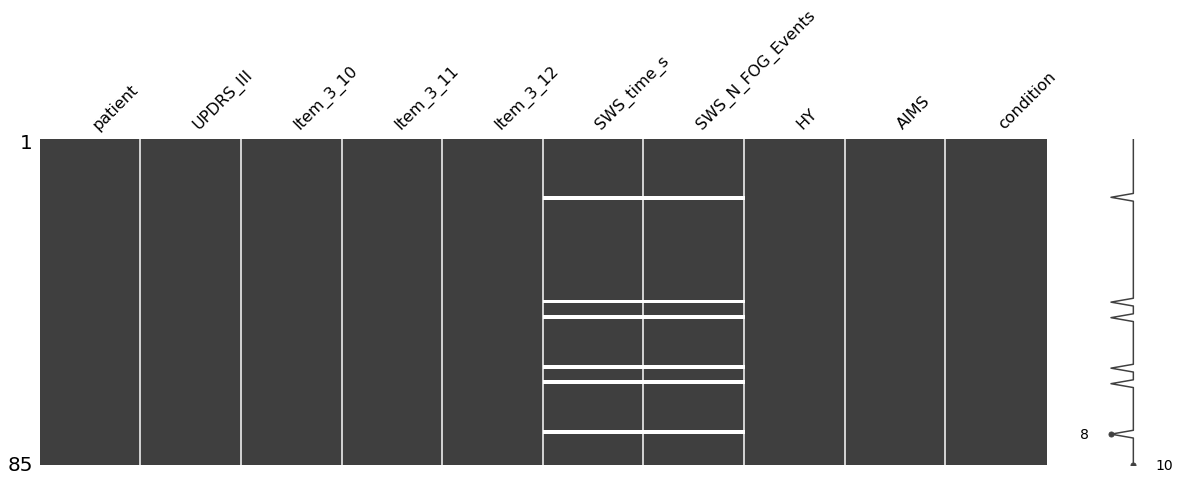

In [ ]:
mno.matrix(FOG_Stim_conditions,figsize = (20,6))



---


**Dealing with the NAs by Complete Case Analysis / List wise deletion is not feasible given the number of patients.**

**Inputing a Measure of Central Tendency would significantly skew the data.**

**The best compromise is to predicte the missing values based on the entire dataset.**


---



In [ ]:
# Remove patient index

patid_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,0:1]

In [ ]:
# Remove condition label

condition_FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,9:10]

In [ ]:
# Select remianing, numeric variables

FOG_Stim_conditions = FOG_Stim_conditions.iloc[:,1:9]

In [ ]:
 # Select colunms to predicted / use as predictors
  
missing_columns = ["UPDRS_III","Item_3_10", "Item_3_11", "Item_3_12", "SWS_time_s", "SWS_N_FOG_Events", "HY", "AIMS"]

In [ ]:
# Input random numbers on the missing spaces

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
# Rename new variables
for feature in missing_columns:
    FOG_Stim_conditions[feature + '_imp'] = FOG_Stim_conditions[feature]
    FOG_Stim_conditions = random_imputation(FOG_Stim_conditions, feature)

In [ ]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = FOG_Stim_conditions[feature + "_imp"]
    parameters = list(set(FOG_Stim_conditions.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = FOG_Stim_conditions[parameters], y = FOG_Stim_conditions[feature + '_imp'])
    
    deter_data.loc[FOG_Stim_conditions[feature].isnull(), "Det" + feature] = model.predict(FOG_Stim_conditions[parameters])[FOG_Stim_conditions[feature].isnull()]

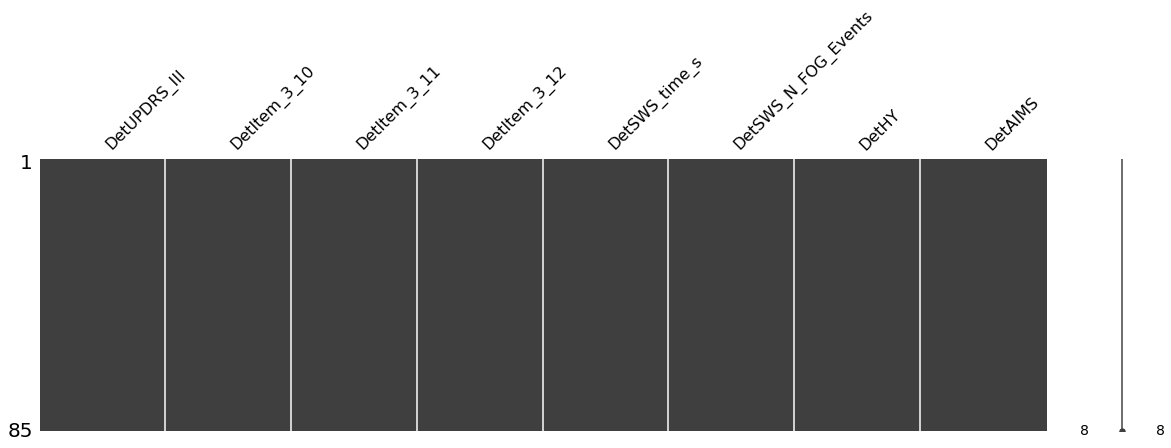

In [ ]:
mno.matrix(deter_data, figsize = (20,5))


In [ ]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS
0,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0
1,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0
2,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0
3,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0
4,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0
...,...,...,...,...,...,...,...,...
80,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0
81,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0
82,39.0,2.0,2.0,0.0,17.0,1.0,2.0,0.0
83,42.0,2.0,1.0,0.0,25.0,1.0,2.0,4.0


In [ ]:
deter_data = pd.concat([deter_data, condition_FOG_Stim_conditions], axis = 1)

In [ ]:
deter_data

,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,condition
0,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0,MED_OFF_STIM_OFF
1,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0,MED_OFF_STIM_OFF
2,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0,MED_OFF_STIM_OFF
3,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0,MED_OFF_STIM_OFF
4,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0,MED_OFF_STIM_OFF
...,...,...,...,...,...,...,...,...,...
80,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0,MED_ON_STIM_ON_60Hz
81,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0,MED_ON_STIM_ON_60Hz
82,39.0,2.0,2.0,0.0,17.0,1.0,2.0,0.0,MED_ON_STIM_ON_60Hz
83,42.0,2.0,1.0,0.0,25.0,1.0,2.0,4.0,MED_ON_STIM_ON_60Hz




---


**Check the new distributions.**

**They have not been compromised** 


---



In [ ]:
deter_data.groupby("condition").describe()["DetUPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,62.000000,9.899495,41.0,57.0,61.0,66.0,79.0
MED_OFF_STIM_ON,17.0,45.941176,8.562057,28.0,43.0,47.0,53.0,59.0
MED_ON_STIM_OFF,17.0,49.352941,10.451921,34.0,39.0,51.0,55.0,71.0
MED_ON_STIM_ON,17.0,38.588235,8.522462,21.0,34.0,42.0,45.0,48.0
MED_ON_STIM_ON_60Hz,17.0,40.705882,9.603155,21.0,37.0,41.0,46.0,62.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_10"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,2.647059,0.701888,2.0,2.0,3.0,3.0,4.0
MED_OFF_STIM_ON,17.0,2.352941,0.492592,2.0,2.0,2.0,3.0,3.0
MED_ON_STIM_OFF,17.0,2.529412,0.717430,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON,17.0,2.352941,0.606339,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,0.353553,1.0,2.0,2.0,2.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_11"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.411765,0.795206,2.0,3.0,4.0,4.0,4.0
MED_OFF_STIM_ON,17.0,2.470588,1.545867,0.0,1.0,3.0,4.0,4.0
MED_ON_STIM_OFF,17.0,3.000000,1.224745,1.0,2.0,4.0,4.0,4.0
MED_ON_STIM_ON,17.0,2.411765,1.121318,1.0,2.0,2.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,2.000000,1.414214,0.0,1.0,2.0,3.0,4.0


In [ ]:
deter_data.groupby("condition").describe()["DetItem_3_12"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,1.882353,1.452685,0.0,1.0,2.0,3.0,4.0
MED_OFF_STIM_ON,17.0,1.117647,1.495090,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_OFF,17.0,1.235294,1.640481,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON,17.0,1.117647,1.615640,0.0,0.0,0.0,3.0,4.0
MED_ON_STIM_ON_60Hz,17.0,0.647059,1.114741,0.0,0.0,0.0,1.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetSWS_time_s"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,234.086466,198.879289,30.0,75.0,160.469920,360.0,599.000000
MED_OFF_STIM_ON,17.0,152.352941,151.172063,19.0,40.0,63.000000,240.0,478.000000
MED_ON_STIM_OFF,17.0,125.972584,89.505227,24.0,37.0,105.871345,180.0,321.000000
MED_ON_STIM_ON,17.0,76.888946,54.737449,22.0,34.0,62.000000,91.0,204.574077
MED_ON_STIM_ON_60Hz,17.0,79.557357,67.214241,17.0,39.0,58.000000,71.0,237.475072


In [ ]:
deter_data.groupby("condition").describe()["DetSWS_N_FOG_Events"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,16.781862,16.052862,2.0,4.0,12.0,21.000000,55.0
MED_OFF_STIM_ON,17.0,11.235294,13.021758,0.0,1.0,4.0,18.000000,36.0
MED_ON_STIM_OFF,17.0,9.571409,7.603982,1.0,2.0,9.0,16.000000,21.0
MED_ON_STIM_ON,17.0,3.965405,3.744217,1.0,2.0,3.0,4.994024,14.0
MED_ON_STIM_ON_60Hz,17.0,5.721527,8.207771,0.0,1.0,3.0,7.000000,31.0


In [ ]:
deter_data.groupby("condition").describe()["DetHY"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,3.000000,1.118034,2.0,2.0,3.0,4.0,5.0
MED_OFF_STIM_ON,17.0,2.647059,0.861770,2.0,2.0,2.0,3.0,4.0
MED_ON_STIM_OFF,17.0,2.705882,1.104802,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON,17.0,2.529412,0.943242,2.0,2.0,2.0,3.0,5.0
MED_ON_STIM_ON_60Hz,17.0,2.176471,0.392953,2.0,2.0,2.0,2.0,3.0


In [ ]:
deter_data.groupby("condition").describe()["DetAIMS"]

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
MED_OFF_STIM_OFF,17.0,4.117647,7.857181,0.0,0.0,0.0,6.0,32.0
MED_OFF_STIM_ON,17.0,3.647059,6.900554,0.0,0.0,0.0,4.0,26.0
MED_ON_STIM_OFF,17.0,9.235294,9.391016,0.0,0.0,8.0,10.0,26.0
MED_ON_STIM_ON,17.0,10.000000,11.958261,0.0,2.0,4.0,18.0,44.0
MED_ON_STIM_ON_60Hz,17.0,12.235294,12.997737,0.0,2.0,6.0,20.0,42.0




---

**First perform a Kruskal-Wallis Rank Sum Test for the variables of interest to check whether any differences are observed** 


---



In [ ]:
DetUPDRS_III_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetUPDRS_III"]
DetUPDRS_III_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetUPDRS_III"]
DetUPDRS_III_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetUPDRS_III"]


In [ ]:
# UPDRS III is different across groups

scipy.stats.kruskal(DetUPDRS_III_MED_OFF_STIM_OFF, 
              DetUPDRS_III_MED_OFF_STIM_ON, 
              DetUPDRS_III_MED_ON_STIM_OFF,
              DetUPDRS_III_MED_ON_STIM_ON,
              DetUPDRS_III_MED_ON_STIM_ON_60Hz)

KruskalResult(statistic=36.25061941768692, pvalue=2.569724039776283e-07)

In [ ]:
scipy.stats.ranksums(DetUPDRS_III_MED_ON_STIM_ON, DetUPDRS_III_MED_ON_STIM_ON_60Hz)

RanksumsResult(statistic=-0.3272135538709788, pvalue=0.7435063701601989)

In [ ]:
# Walking time is not

DetSWS_time_s_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetSWS_time_s"]
DetSWS_time_s_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetSWS_time_s"]
DetSWS_time_s_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetSWS_time_s"]


In [ ]:
scipy.stats.ranksums(DetSWS_time_s_MED_ON_STIM_ON, DetSWS_time_s_MED_ON_STIM_ON_60Hz)

RanksumsResult(statistic=0.3616570858573976, pvalue=0.7176082997293356)

In [ ]:
scipy.stats.ranksums(DetSWS_time_s_MED_OFF_STIM_ON, DetSWS_time_s_MED_OFF_STIM_OFF)

RanksumsResult(statistic=-1.4466283434295903, pvalue=0.14800104348373633)

In [ ]:
# The number of FOG events is borderline

DetSWS_N_FOG_Events_MED_OFF_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_OFF"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_OFF_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_OFF_STIM_ON"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_OFF = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_OFF"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_ON = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON"),"DetSWS_N_FOG_Events"]
DetSWS_N_FOG_Events_MED_ON_STIM_ON_60Hz = deter_data.loc[(deter_data["condition"] == "MED_ON_STIM_ON_60Hz"),"DetSWS_N_FOG_Events"]


In [ ]:
scipy.stats.ranksums(DetSWS_N_FOG_Events_MED_OFF_STIM_ON, DetSWS_N_FOG_Events_MED_OFF_STIM_OFF)


RanksumsResult(statistic=-1.5844024713752656, pvalue=0.11310215988839718)



---

**Perform Kruskal-Wallis with post hoc Dunn's test and p-value adjustment for multiple comparison**

---



In [ ]:
def p_rounder(p_value):
    if p_value < .0001:
        p_value = '<.0001'
    else:
        p_value = str((round(p_value,4)))
    return p_value

def bon_correct(p_value,k):
    corrected_p = p_value * ((k *(k-1))/2)
    return p_value, corrected_p


In [ ]:
def kw_dunn_post_hoc(df,strat,comp_list, var):
    post_hoc_result_dict = {}
    N = df['rank'].count()
    n_groups = df[strat].nunique()
    for comp in comp_list:
        m1 = df.loc[df[strat] == comp[0]]['rank'].mean()
        n1 = df.loc[df[strat] == comp[0]]['rank'].count()
        m2 = df.loc[df[strat] == comp[1]]['rank'].mean()
        n2 = df.loc[df[strat] == comp[1]]['rank'].count()
        Z = (m1 - m2)/math.sqrt(((N*(N+1))/12)*((1/n1)+(1/n2)))
        Z = round(Z,4)
        p = scipy.stats.norm.sf(abs(Z))
        p, corrected_p = bon_correct(p,n_groups)
        p = p_rounder(p)
        corrected_p = p_rounder(corrected_p)
        comparison = f'{comp[0]} vs. {comp[1]}'
        post_hoc_result_dict[comparison] = [var,Z,p,corrected_p]
    return post_hoc_result_dict


In [ ]:
def kw_test(df,stratifier,var):
    import sys
    from math import sqrt
    result_list = []
    strat_list = []
    comparison_list = []
    counter = 0
    temp_df = df[[stratifier,var]].copy()
    temp_df['rank'] = temp_df[var].rank(method='average')
    for strat in df[stratifier].unique():
        result = df.loc[df[stratifier] == strat][var].values
        result_list.append(result)
        strat_list.append(strat)
    for st in strat_list:
        for st2 in strat_list:
            if st != st2 and [st2,st] not in comparison_list:
                comparison_list.append([st,st2])
    post_hoc_result_dict = kw_dunn_post_hoc(temp_df,stratifier,comparison_list,var)
    if len(result_list) == 2:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1])
    if len(result_list) == 3:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2])
    elif len(result_list) == 4:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3])
    elif len(result_list) == 5:
        k,p = scipy.stats.kruskal(result_list[0],result_list[1],result_list[2],result_list[3],result_list[4])
    else:
        print('Stratifying levels greater than 5. Please modify code to accomodate.')
        sys.exit()
    k = round(k,4)    
    p = p_rounder(p)
    return k, p, post_hoc_result_dict

In [ ]:
k, p, post_hoc_result_dict = kw_test(deter_data,'condition','DetUPDRS_III')



---

**Check where the differences actually are**


---



In [ ]:
kw_test(deter_data,'condition','DetUPDRS_III')

(36.2506,
 '<.0001',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetUPDRS_III',
   3.4847,
   '0.0002',
   '0.0025'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetUPDRS_III',
   2.6717,
   '0.0038',
   '0.0377'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   5.3399,
   '<.0001',
   '<.0001'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   4.9196,
   '<.0001',
   '<.0001'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetUPDRS_III',
   -0.813,
   '0.2081',
   '2.0811'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   1.8553,
   '0.0318',
   '0.3178'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   1.4349,
   '0.0757',
   '0.7566'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetUPDRS_III',
   2.6682,
   '0.0038',
   '0.0381'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   2.2478,
   '0.0123',
   '0.1229'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetUPDRS_III',
   -0.4204,
   '0.3371',
   '3.371']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_10')

(10.7765,
 '0.0292',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_10',
   1.018,
   '0.1543',
   '1.5434'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_10',
   0.5489,
   '0.2915',
   '2.9154'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_10',
   1.1951,
   '0.116',
   '1.1602'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   2.5883,
   '0.0048',
   '0.0482'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_10',
   -0.469,
   '0.3195',
   '3.1953'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_10',
   0.1772,
   '0.4297',
   '4.2968'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.5704,
   '0.0582',
   '0.5816'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_10',
   0.6462,
   '0.2591',
   '2.5907'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   2.0394,
   '0.0207',
   '0.2071'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_10',
   1.3932,
   '0.0818',
   '0.8178']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_11')

(11.2912,
 '0.0235',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_11',
   1.8761,
   '0.0303',
   '0.3032'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_11',
   0.8477,
   '0.1983',
   '1.983'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_11',
   2.2096,
   '0.0136',
   '0.1357'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   2.8663,
   '0.0021',
   '0.0208'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_11',
   -1.0284,
   '0.1519',
   '1.5188'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_11',
   0.3335,
   '0.3694',
   '3.6938'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   0.9902,
   '0.161',
   '1.6104'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_11',
   1.3619,
   '0.0866',
   '0.8661'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   2.0185,
   '0.0218',
   '0.2177'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_11',
   0.6566,
   '0.2557',
   '2.5572']})

In [ ]:
kw_test(deter_data,'condition','DetItem_3_12')

(7.4746,
 '0.1128',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetItem_3_12',
   1.5912,
   '0.0558',
   '0.5578'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetItem_3_12',
   1.4175,
   '0.0782',
   '0.7817'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_12',
   1.6885,
   '0.0457',
   '0.4566'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   2.3903,
   '0.0084',
   '0.0842'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetItem_3_12',
   -0.1737,
   '0.4311',
   '4.3105'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetItem_3_12',
   0.0973,
   '0.4612',
   '4.6124'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.7991,
   '0.2121',
   '2.1212'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetItem_3_12',
   0.271,
   '0.3932',
   '3.932'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.9728,
   '0.1653',
   '1.6533'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetItem_3_12',
   0.7018,
   '0.2414',
   '2.414']})

In [ ]:
kw_test(deter_data,'condition','DetSWS_time_s')

(10.0719,
 '0.0392',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetSWS_time_s',
   1.5877,
   '0.0562',
   '0.5618'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetSWS_time_s',
   1.4279,
   '0.0767',
   '0.7666'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   2.6613,
   '0.0039',
   '0.0389'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   2.7655,
   '0.0028',
   '0.0284'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetSWS_time_s',
   -0.1598,
   '0.4365',
   '4.3652'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   1.0735,
   '0.1415',
   '1.4152'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   1.1778,
   '0.1194',
   '1.1944'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_time_s',
   1.2334,
   '0.1087',
   '1.0871'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   1.3376,
   '0.0905',
   '0.9051'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_time_s',
   0.1042,
   '0.4585',
   '4.

In [ ]:
kw_test(deter_data,'condition','DetSWS_N_FOG_Events')

(13.3956,
 '0.0095',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetSWS_N_FOG_Events',
   1.9352,
   '0.0265',
   '0.2648'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetSWS_N_FOG_Events',
   1.2334,
   '0.1087',
   '1.0871'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   2.9462,
   '0.0016',
   '0.0161'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   3.1268,
   '0.0009',
   '0.0088'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetSWS_N_FOG_Events',
   -0.7018,
   '0.2414',
   '2.414'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   1.011,
   '0.156',
   '1.5601'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   1.1917,
   '0.1167',
   '1.1669'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetSWS_N_FOG_Events',
   1.7128,
   '0.0434',
   '0.4337'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetSWS_N_FOG_Events',
   1.8935,
   '0.0291',
   '0.2915'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz

In [ ]:
kw_test(deter_data,'condition','DetHY')

(6.244,
 '0.1817',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetHY',
   0.7643,
   '0.2223',
   '2.2234'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetHY',
   0.8825,
   '0.1888',
   '1.8875'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetHY', 1.2646, '0.103', '1.0301'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   2.0568,
   '0.0199',
   '0.1985'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetHY', 0.1181, '0.453', '4.5299'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetHY', 0.5003, '0.3084', '3.0843'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.2924,
   '0.0981',
   '0.9811'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetHY', 0.3822, '0.3512', '3.5116'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   1.1743,
   '0.1201',
   '1.2014'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetHY',
   0.7921,
   '0.2142',
   '2.1415']})

In [ ]:
kw_test(deter_data,'condition','DetAIMS')

(11.1554,
 '0.0249',
 {'MED_OFF_STIM_OFF vs. MED_OFF_STIM_ON': ['DetAIMS',
   0.1772,
   '0.4297',
   '4.2968'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_OFF': ['DetAIMS',
   -1.89,
   '0.0294',
   '0.2938'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON': ['DetAIMS',
   -1.8031,
   '0.0357',
   '0.3569'],
  'MED_OFF_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -2.234,
   '0.0127',
   '0.1274'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_OFF': ['DetAIMS',
   -2.0672,
   '0.0194',
   '0.1936'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON': ['DetAIMS',
   -1.9803,
   '0.0238',
   '0.2383'],
  'MED_OFF_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -2.4111,
   '0.008',
   '0.0795'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON': ['DetAIMS',
   0.0869,
   '0.4654',
   '4.6538'],
  'MED_ON_STIM_OFF vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -0.344,
   '0.3654',
   '3.6542'],
  'MED_ON_STIM_ON vs. MED_ON_STIM_ON_60Hz': ['DetAIMS',
   -0.4308,
   '0.3333',
   '3.3331']})

   

---


        
              



---


                 



---

---



 **As the data is paired (i.e. it has repeated measures), perform the Friedman Test instead**


---

---







---



---
**Post-hoc pairwise multiple comparison is performed according to Conover with FDR correction**


---



---




In [ ]:
deter_data = pd.concat([patid_FOG_Stim_conditions, deter_data], axis = 1)

In [ ]:
deter_data

,patient,DetUPDRS_III,DetItem_3_10,DetItem_3_11,DetItem_3_12,DetSWS_time_s,DetSWS_N_FOG_Events,DetHY,DetAIMS,condition
0,A1,55.0,2.0,2.0,0.0,49.0,2.0,2.0,0.0,MED_OFF_STIM_OFF
1,B2,79.0,2.0,3.0,0.0,75.0,4.0,2.0,0.0,MED_OFF_STIM_OFF
2,C3,65.0,3.0,4.0,1.0,439.0,34.0,2.0,6.0,MED_OFF_STIM_OFF
3,D4,75.0,4.0,4.0,4.0,258.0,19.0,5.0,6.0,MED_OFF_STIM_OFF
4,E5,59.0,2.0,3.0,3.0,111.0,16.0,4.0,32.0,MED_OFF_STIM_OFF
...,...,...,...,...,...,...,...,...,...,...
80,M13,44.0,2.0,4.0,0.0,166.0,12.0,3.0,12.0,MED_ON_STIM_ON_60Hz
81,N14,29.0,2.0,2.0,0.0,55.0,4.0,2.0,20.0,MED_ON_STIM_ON_60Hz
82,O15,39.0,2.0,2.0,0.0,17.0,1.0,2.0,0.0,MED_ON_STIM_ON_60Hz
83,P16,42.0,2.0,1.0,0.0,25.0,1.0,2.0,4.0,MED_ON_STIM_ON_60Hz




---
**UPDRS III**


---




In [ ]:
pg.friedman(data=deter_data, dv="DetUPDRS_III", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.757331,4,51.498507,1.756115e-10




---

**Kendall's W is large (>0.1 small effect size, >0.3 moderate effect size, >0.5 large effect size) after Cohen's interpretation guideline.**

---




In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetUPDRS_III", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000e+00,0.000973,0.029924,6.835621e-07,0.000002
MED_OFF_STIM_ON,9.726294e-04,1.000000,0.183673,3.823715e-02,0.079228
MED_ON_STIM_OFF,2.992382e-02,0.183673,1.000000,1.237834e-03,0.003236
MED_ON_STIM_ON,6.835621e-07,0.038237,0.001238,1.000000e+00,0.706784
MED_ON_STIM_ON_60Hz,1.505511e-06,0.079228,0.003236,7.067840e-01,1.000000




---

**SWS Time**

---



In [ ]:
pg.friedman(data=deter_data, dv="DetSWS_time_s", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.26566,4,18.064897,0.001199


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetSWS_time_s", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.053265,0.359137,0.008600,0.008600
MED_OFF_STIM_ON,0.053265,1.000000,0.337550,0.405749,0.359137
MED_ON_STIM_OFF,0.359137,0.337550,1.000000,0.062907,0.053265
MED_ON_STIM_ON,0.008600,0.405749,0.062907,1.000000,0.830765
MED_ON_STIM_ON_60Hz,0.008600,0.359137,0.053265,0.830765,1.000000



---

**Number of FOG Events**

---




In [ ]:
pg.friedman(data=deter_data, dv="DetSWS_N_FOG_Events", within="condition", subject="patient")

,Source,W,ddof1,Q,p-unc
Friedman,condition,0.304466,4,20.703704,0.000363


In [ ]:
sp.posthoc_conover_friedman(a=deter_data, y_col="DetSWS_N_FOG_Events", group_col="condition", block_col="patient", p_adjust="fdr_bh", melted=True)

,MED_OFF_STIM_OFF,MED_OFF_STIM_ON,MED_ON_STIM_OFF,MED_ON_STIM_ON,MED_ON_STIM_ON_60Hz
MED_OFF_STIM_OFF,1.000000,0.060785,0.193561,0.002868,0.002337
MED_OFF_STIM_ON,0.060785,1.000000,0.458981,0.289214,0.204285
MED_ON_STIM_OFF,0.193561,0.458981,1.000000,0.092583,0.060785
MED_ON_STIM_ON,0.002868,0.289214,0.092583,1.000000,0.784495
MED_ON_STIM_ON_60Hz,0.002337,0.204285,0.060785,0.784495,1.000000





---


---
**PLOT DATA**


---



---



In [ ]:
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

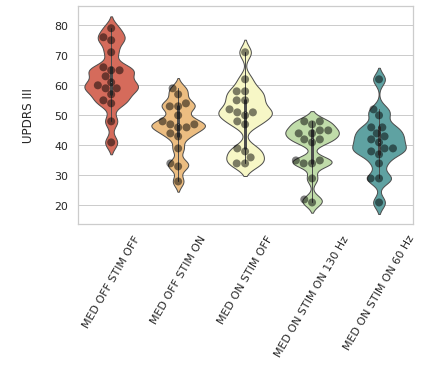

In [ ]:

ax = sns.violinplot(x="condition", y="DetUPDRS_III", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetUPDRS_III", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 8, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])


In [ ]:
# Plot data
sns.set(style="whitegrid")

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

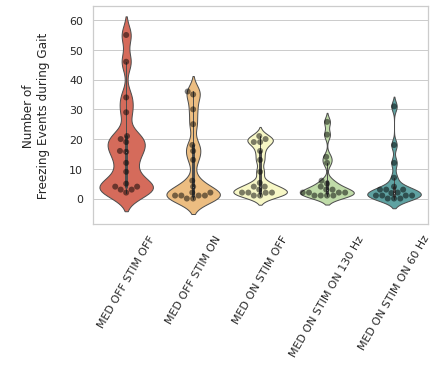

In [ ]:
ax = sns.violinplot(x="condition", y="DetSWS_N_FOG_Events", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_N_FOG_Events", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Number of \n Freezing Events during Gait \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

[Text(0, 0, 'MED OFF STIM OFF'),
 Text(0, 0, 'MED OFF STIM ON'),
 Text(0, 0, 'MED ON STIM OFF'),
 Text(0, 0, 'MED ON STIM ON 130 Hz'),
 Text(0, 0, 'MED ON STIM ON 60 Hz')]

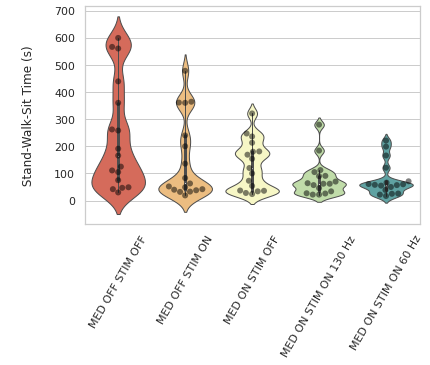

In [ ]:
ax = sns.violinplot(x="condition", y="DetSWS_time_s", data=deter_data, palette="Spectral", linewidth = 1, alpha = 10, scale="width", bw=0.2, cut=2)

sns.swarmplot(y = "DetSWS_time_s", 
                x = "condition", 
                data = deter_data, 
                   color = "black", edgecolor = "black", size = 6, alpha = 0.5)

ax.set(xlabel=None)
ax.set(ylabel="\n Stand-Walk-Sit Time (s) \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)

ax.set_xticklabels(['MED OFF STIM OFF', 'MED OFF STIM ON', 'MED ON STIM OFF', 'MED ON STIM ON 130 Hz', 'MED ON STIM ON 60 Hz'])

In [ ]:
deter_data = pd.concat([patid_FOG_Stim_conditions, deter_data], axis = 1)

In [ ]:
DetUPDRS_III_OFF = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_OFF_STIM_OFF"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_OFF"}).reset_index(drop=True)

DetUPDRS_III_60Hz = pd.DataFrame(
    deter_data.DetUPDRS_III[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetUPDRS_III": "DetUPDRS_III_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetUPDRS_III_OFF.join(DetUPDRS_III_60Hz)

OFF_to60Hz = DetUPDRS_III_OFF.join(DetUPDRS_III_60Hz)

OFF_to60Hz["Difference"] =   OFF_to60Hz["DetUPDRS_III_60Hz"] / OFF_to60Hz["DetUPDRS_III_OFF"]

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetUPDRS_III_OFF,DetUPDRS_III_60Hz,Difference
0,55.0,50.0,0.909091
5,59.0,52.0,0.881356
11,71.0,62.0,0.873239
14,48.0,39.0,0.812500
4,59.0,46.0,0.779661
10,41.0,29.0,0.707317
9,54.0,38.0,0.703704
12,66.0,44.0,0.666667
16,65.0,41.0,0.630769
3,75.0,46.0,0.613333


In [ ]:
DetSWS_N_FOG_Events_OFF = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_OFF_STIM_OFF"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_OFF"}).reset_index(drop=True)

DetSWS_N_FOG_Events_60Hz = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetSWS_N_FOG_Events_OFF.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz = DetSWS_N_FOG_Events_OFF.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz["Difference"] =   ((OFF_to60Hz["DetSWS_N_FOG_Events_OFF"] - OFF_to60Hz["DetSWS_N_FOG_Events_60Hz"]) / OFF_to60Hz["DetSWS_N_FOG_Events_OFF"])*100

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_N_FOG_Events_OFF,DetSWS_N_FOG_Events_60Hz,Difference
16,29.00000,0.000000,100.000000
9,9.00000,0.000000,100.000000
2,34.00000,0.000000,100.000000
8,46.00000,1.833268,96.014635
3,19.00000,1.000000,94.736842
15,15.71886,1.000000,93.638216
6,55.00000,7.000000,87.272727
7,20.00000,3.000000,85.000000
14,5.00000,1.000000,80.000000
1,4.00000,1.000000,75.000000


In [ ]:
DetSWS_N_FOG_Events_ON = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_ON"}).reset_index(drop=True)

DetSWS_N_FOG_Events_60Hz = pd.DataFrame(
    deter_data.DetSWS_N_FOG_Events[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_N_FOG_Events": "DetSWS_N_FOG_Events_60Hz"}).reset_index(drop=True)

OFF_to60Hz = DetSWS_N_FOG_Events_ON.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz = DetSWS_N_FOG_Events_ON.join(DetSWS_N_FOG_Events_60Hz)

OFF_to60Hz["Difference"] =  ((OFF_to60Hz["DetSWS_N_FOG_Events_ON"] - OFF_to60Hz["DetSWS_N_FOG_Events_60Hz"]) / OFF_to60Hz["DetSWS_N_FOG_Events_ON"])*100

OFF_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_N_FOG_Events_ON,DetSWS_N_FOG_Events_60Hz,Difference
16,16.0,0.000000,100.000000
9,2.0,0.000000,100.000000
2,4.0,0.000000,100.000000
15,30.0,1.000000,96.666667
8,36.0,1.833268,94.907589
7,18.0,3.000000,83.333333
6,25.0,7.000000,72.000000
13,13.0,4.000000,69.230769
12,35.0,12.000000,65.714286
3,2.0,1.000000,50.000000


In [ ]:
DetSWS_time_s_ON = pd.DataFrame(
    deter_data.DetSWS_time_s[deter_data.condition == "MED_OFF_STIM_ON"]
    ).rename(columns={"DetSWS_time_s": "DetSWS_time_s_ON"}).reset_index(drop=True)

DetSWS_time_s_60Hz = pd.DataFrame(
    deter_data.DetSWS_time_s[deter_data.condition == "MED_ON_STIM_ON_60Hz"]
    ).rename(columns={"DetSWS_time_s": "DetSWS_time_s_60Hz"}).reset_index(drop=True)

ON_to60Hz = DetSWS_time_s_ON.join(DetSWS_time_s_60Hz)

ON_to60Hz = DetSWS_time_s_ON.join(DetSWS_time_s_60Hz)

ON_to60Hz["Difference"] =  ((ON_to60Hz["DetSWS_time_s_ON"] - ON_to60Hz["DetSWS_time_s_60Hz"]) / ON_to60Hz["DetSWS_time_s_ON"])*100

ON_to60Hz.sort_values("Difference", ascending=False)

,DetSWS_time_s_ON,DetSWS_time_s_60Hz,Difference
15,360.0,25.000000,93.055556
7,200.0,39.000000,80.500000
16,364.0,71.000000,80.494505
13,240.0,55.000000,77.083333
12,478.0,166.000000,65.271967
6,136.0,60.000000,55.882353
2,40.0,22.000000,45.000000
8,361.0,198.698137,44.958965
3,83.0,57.000000,31.325301
9,32.0,26.000000,18.750000


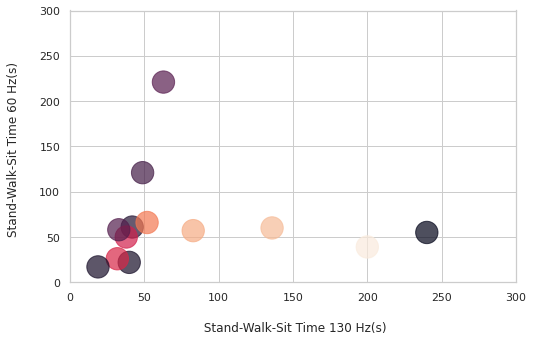

In [ ]:


fig, ax = plt.subplots(figsize=(8, 5))

colors = np.random.rand(17)
area = (30 * np.random.rand(17))**2

ax.scatter(x = ON_to60Hz['DetSWS_time_s_ON'], y = ON_to60Hz['DetSWS_time_s_60Hz'], s = 500, alpha=0.7, c=colors)
plt.xlabel("\n Stand-Walk-Sit Time 130 Hz(s)")
plt.ylabel("Stand-Walk-Sit Time 60 Hz(s) \n")

plt.xlim([0, 300])
plt.ylim([0, 300])

plt.show()